In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets,models,transforms

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2024-02-06 17:11:47--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.86.38.96, 99.86.38.106, 99.86.38.37, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.86.38.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   179MB/s    in 0.3s    

2024-02-06 17:11:48 (179 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [ ]:
!ls

hymenoptera_data.zip  sample_data


In [ ]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [ ]:
!ls

hymenoptera_data  hymenoptera_data.zip	sample_data


In [ ]:
!ls hymenoptera_data/

train  val


In [ ]:
!ls hymenoptera_data/train

ants  bees


In [ ]:
transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [ ]:
train_dataset=datasets.ImageFolder("./hymenoptera_data/train",transform=transform)

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)

In [ ]:
data_iter=iter(train_loader)

In [ ]:
imgs,labels=next(data_iter)

In [ ]:
labels

tensor([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
imgs.size()

torch.Size([32, 3, 224, 224])

In [ ]:
img=imgs[0]

In [ ]:
img_permute=img.permute(1,2,0)

In [ ]:
img_permute=0.5*img_permute+0.5

In [ ]:
img_permute=np.clip(img_permute,0,1)

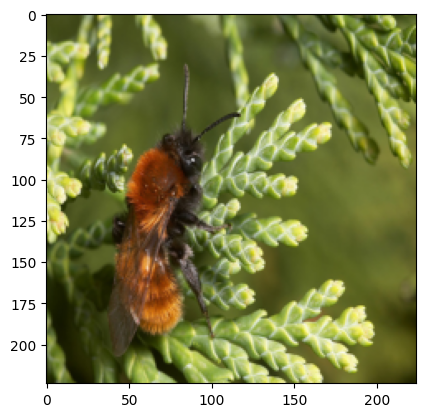

In [ ]:
plt.imshow(img_permute)

In [ ]:
model=models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in model.parameters():
    param.requires_grad=False

In [ ]:
model.fc=nn.Linear(512,2)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.fc.parameters(),lr=0.001)

In [ ]:
num_epochs=15
losses=[]
accs=[]
for epoch in range(num_epochs):
    running_loss=0.0
    running_acc=0.0
    for imgs,labels in train_loader:
        imgs=imgs.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()
        output=model(imgs)
        loss=criterion(output,labels)
        running_loss+=loss.item()
        pred=torch.argmax(output,dim=1)
        running_acc+=torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss/=len(train_loader)
    running_acc/=len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc.cpu())
    print("epoch: {},loss: {},acc: {}".format(epoch,running_loss,running_acc))

epoch: 0,loss: 0.6077471524477005,acc: 0.6656249761581421
epoch: 1,loss: 0.4425209164619446,acc: 0.832812488079071
epoch: 2,loss: 0.3608366996049881,acc: 0.878125011920929
epoch: 3,loss: 0.27150167524814606,acc: 0.9507812261581421
epoch: 4,loss: 0.24009629525244236,acc: 0.9585937261581421
epoch: 5,loss: 0.21376698650419712,acc: 0.96484375
epoch: 6,loss: 0.18672675266861916,acc: 0.952343761920929
epoch: 7,loss: 0.18378114886581898,acc: 0.942187488079071
epoch: 8,loss: 0.1661305483430624,acc: 0.9624999761581421
epoch: 9,loss: 0.20325464475899935,acc: 0.944531261920929
epoch: 10,loss: 0.15883104223757982,acc: 0.95703125
epoch: 11,loss: 0.12227348610758781,acc: 0.975781261920929
epoch: 12,loss: 0.17608150839805603,acc: 0.9351562261581421
epoch: 13,loss: 0.12306624837219715,acc: 0.984375
epoch: 14,loss: 0.11819012835621834,acc: 0.98828125


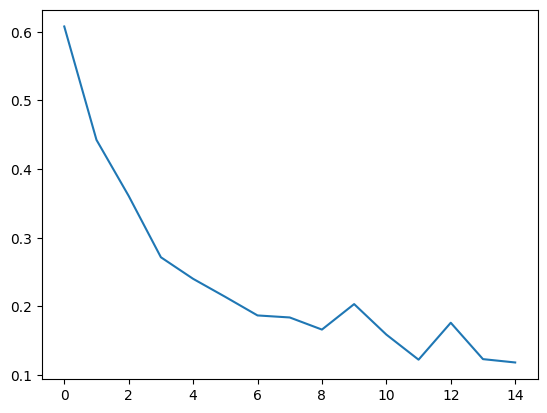

In [ ]:
plt.plot(losses)

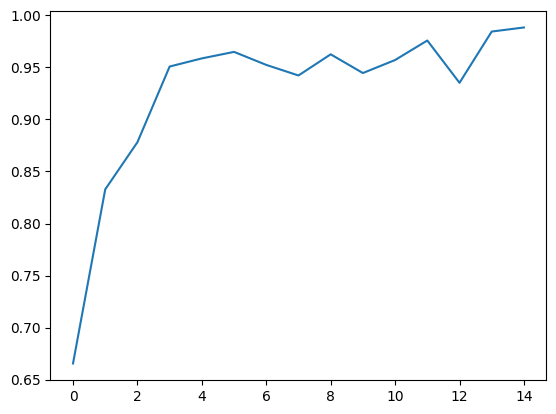

In [ ]:
plt.plot(accs)